In [1]:
import fitsio
%matplotlib inline
import sys
sys.path.append('/Users/vipasu/Dropbox/Research/addgals/code_for_addgals')
from routines import * 


In [2]:
#data_dir = '/nfs/slac/g/ki/ki23/des/vipasu/addgals/'
data_dir = '../'
#__builtin__.image_prefix = data_dir + "Images/dist + mvir thresh/"
__builtin__.image_prefix = data_dir + "plots/"

mkdir_p(image_prefix)

In [3]:
##################################################
# read data
d0 = fits_to_pandas(fitsio.read(data_dir + 'Becker_CAM_mock.fits', lower=True))
box_size = 250.0    
np.random.seed(111)


In [4]:
mass, smin, smax, Mv_cut, nn =  5e12, 9.0, 13.0, 1e12, 1
name = "mv cut {}; {} < M* < {}".format(Mv_cut, smin, smax)
d, dp = catalog_selection(d0, Mv_cut, smin, smax)
#dist, mvir, _ = get_dist_mass_vmax(dp,d, nn, Mv_cut)
dist, res = get_dist_and_attrs(dp, d, nn, ['mvir', 'vmax'])
mvir, vmax = res
d['host_mvir'] = mvir
d['host_vmax'] = vmax
d['host_dist'] = dist
print "Number of data points", len(d)
d_train, d_test = split_octant(d, box_size)

0 207054
10000 207054
20000 207054
30000 207054
40000 207054
50000 207054
60000 207054
70000 207054
80000 207054
90000 207054
100000 207054
110000 207054
120000 207054
130000 207054
140000 207054
150000 207054
160000 207054
170000 207054
180000 207054
190000 207054
200000 207054
Number of data points 207054


In [5]:
features = ['host_dist', 'host_mvir', 'mstar']
Xtrain, ytrain, x_scaler, y_scaler = select_features(features, d_train, scaled=True)
Xtest, ytest = select_features(features, d_test, scaled=False)
Xtest, ytest = x_scaler.transform(Xtest), y_scaler.transform(ytest)

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

y_hat_scaled = model.predict(Xtest)
y_hat = y_scaler.inverse_transform(y_hat_scaled)
d_test['pred'] = y_hat
print min(y_hat), max(y_hat)

-13.0022602081 -8.60770988464


[-2.3979279159240803, 12.715696136482656]


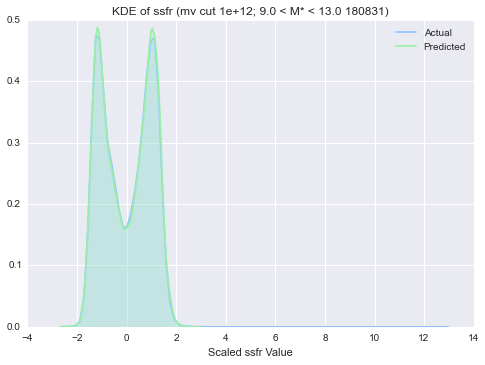

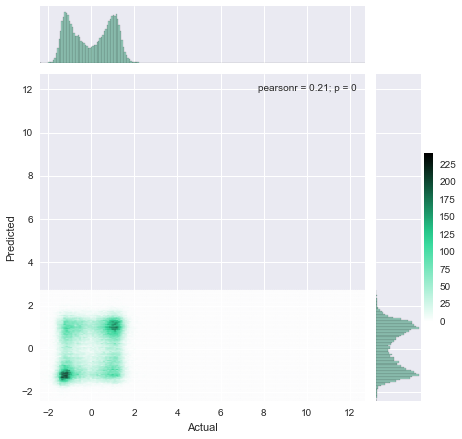

In [6]:
sample_model(model, name, Xtrain, ytrain, Xtest, ytest, -1)

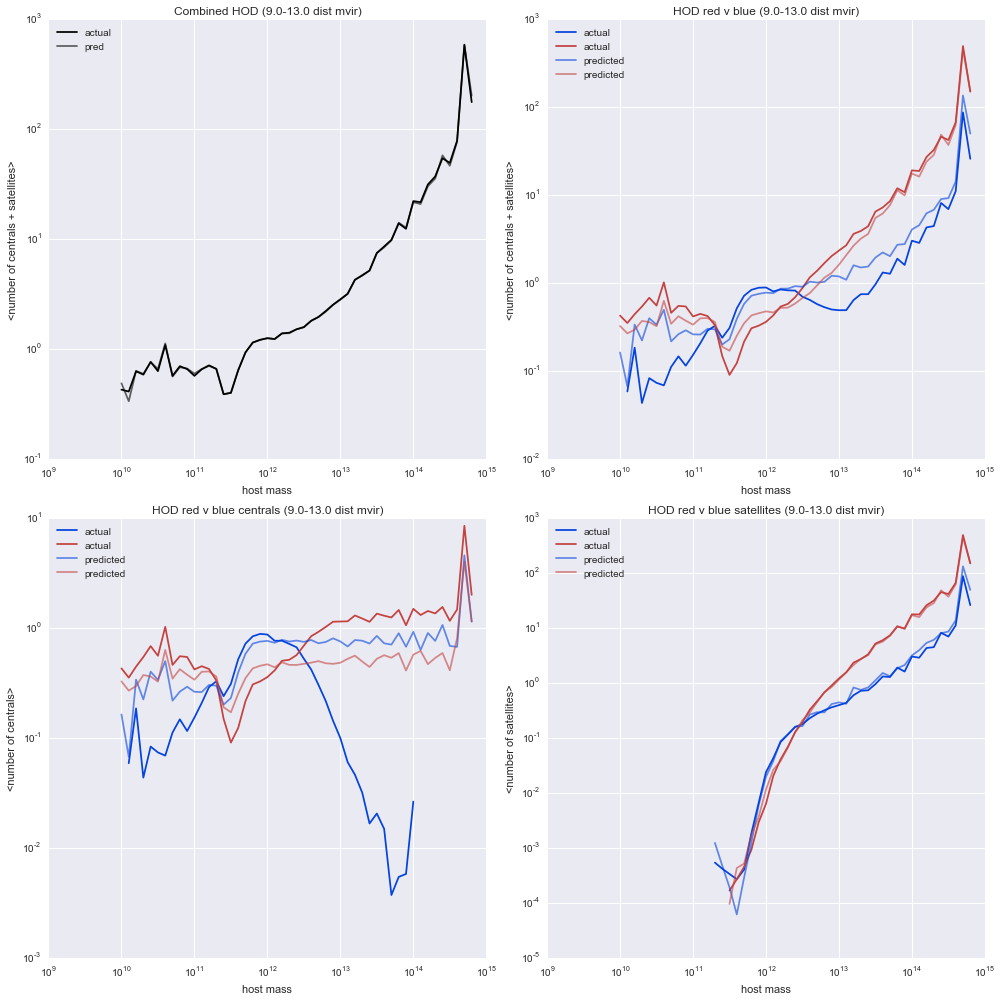

In [7]:
plot_HOD(d0, d_test, '9.0-13.0 dist mvir', 9.0, 13.0)

Chi square is:  (14.88980622698149, 0.9999798168329862)


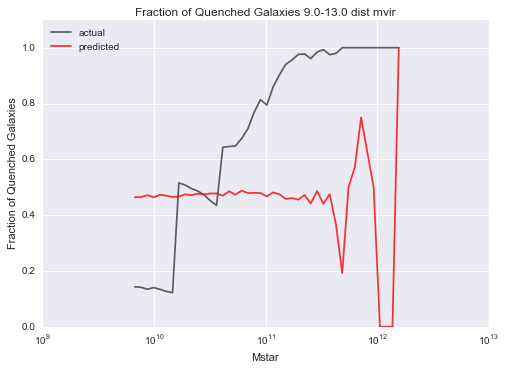

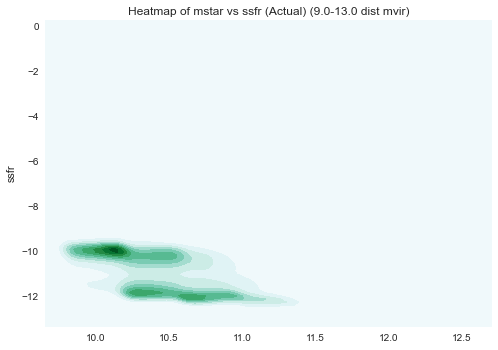

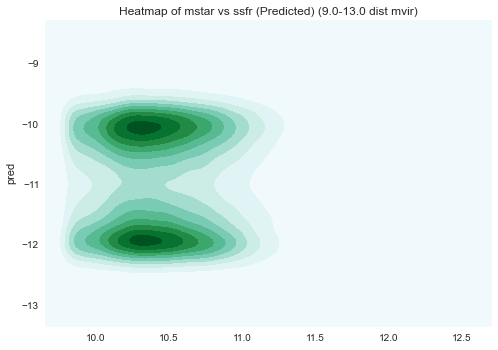

In [8]:
plot_p_red(10**d_test['mstar'].values, d_test['ssfr'], d_test['pred'], '9.0-13.0 dist mvir')

0th bin
chi square is: (343.06946376167429, 2.7588424421611557e-61)
1th bin
chi square is: (80.30507261307973, 1.6474676784029749e-09)


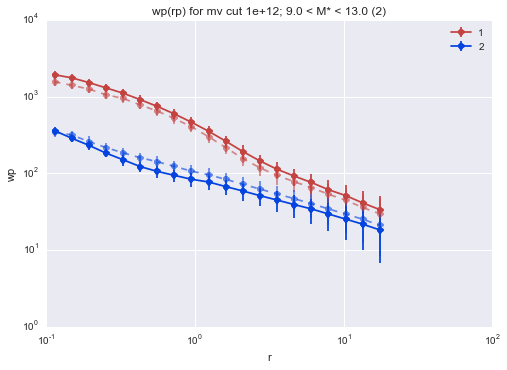

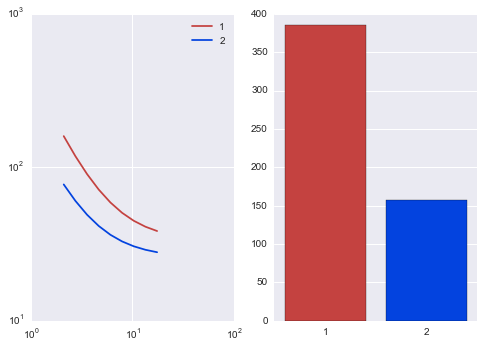

0th bin
chi square is: (1059.6644873666412, 9.6018245903596278e-213)
1th bin
chi square is: (98.208238175541268, 1.1289559469480959e-12)
2th bin
chi square is: (77.546014225507179, 4.9062063809598035e-09)


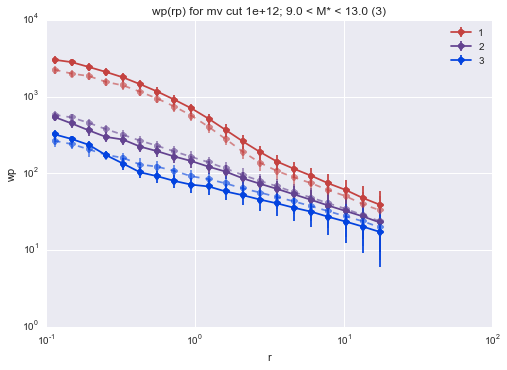

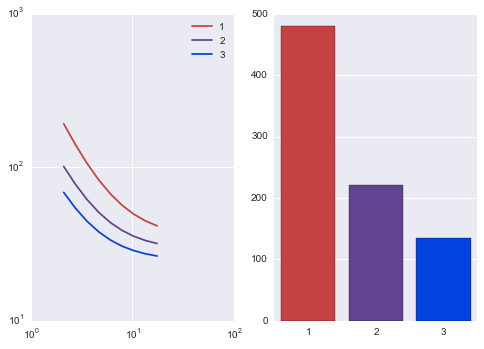

0th bin
chi square is: (1806.5430919451778, 0.0)
1th bin
chi square is: (81.283470687506551, 1.1162492076069774e-09)
2th bin
chi square is: (134.56006372192635, 1.9893049784958346e-19)
3th bin
chi square is: (124.39291281517043, 1.6649847827297912e-17)


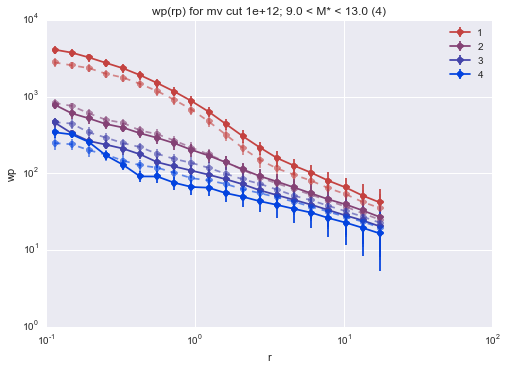

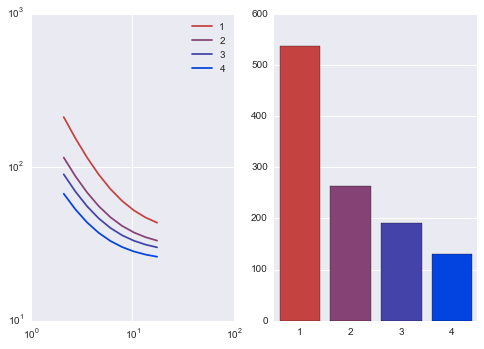

0th bin
chi square is: (2556.5310268450107, 0.0)
1th bin
chi square is: (29.868281259377717, 0.053498905464666825)
2th bin
chi square is: (108.13157577040879, 1.7593394098675394e-14)
3th bin
chi square is: (106.71811822814692, 3.1968933691273142e-14)
4th bin
chi square is: (160.90288953176207, 1.6928135599360492e-24)


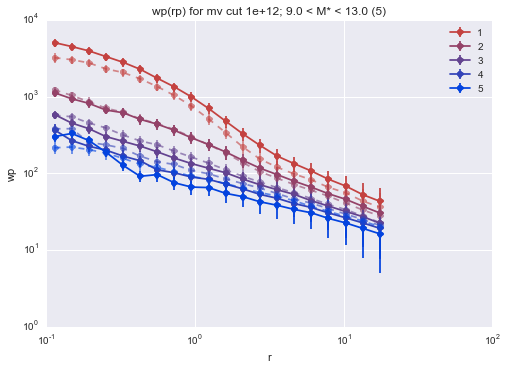

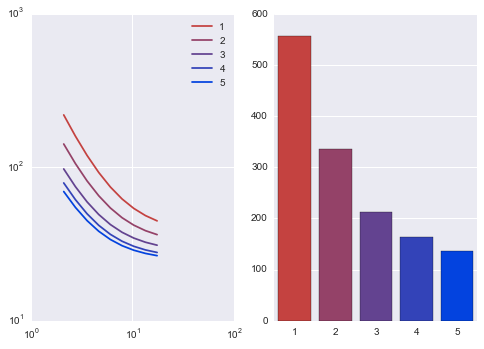

In [9]:
N_splits = 5
for i in xrange(1, N_splits):
    desc = name + " (" + str(i+1) + ")"
    actual_xis, actual_cov, pred_xis, pred_cov = wprp_comparison(d_test, desc, i)
    plot_wprp(actual_xis, actual_cov, pred_xis, pred_cov, desc, i)

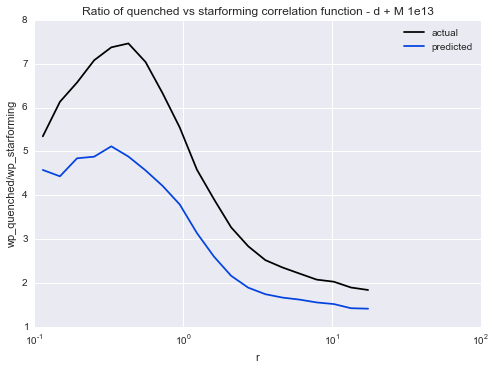

In [10]:
c_actual, c_pred = wprp_fraction(d_test, name + 'mvir + dist')
plt.semilogx(r, c_actual, label='actual', color='k')
plt.plot(r, c_pred, label='predicted', color=blue_col)
plt.title('Ratio of quenched vs starforming correlation function - d + M 1e13')
plt.xlabel('r')
plt.ylabel('wp_quenched/wp_starforming')
plt.legend()

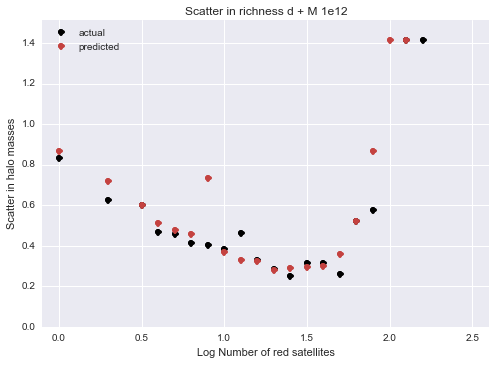

In [6]:
plot_richness_scatter(d_test, 'd + M 1e12', d0)

In [ ]:
#plot_density_profile(d0, d, d_test, '10.1-10.5 all')

In [ ]:
#plot_density_profile(d0, d_test, d_test, '10.1-10.5')

In [ ]:
mass, smin, smax, Mv_cut, nn =  5e12, 9.0, 13.0, 1e12, 1
name = "mv cut {}; {} < M* < {}".format(Mv_cut, smin, smax)
d, dp = catalog_selection(d0, Mv_cut, smin, smax)
#dist, mvir, _ = get_dist_mass_vmax(dp,d, nn, Mv_cut)
dist, res = get_dist_and_attrs(dp, d, nn, ['mvir', 'vmax'])
mvir, vmax = res
d['host_mvir'] = mvir
d['host_vmax'] = vmax
d['host_dist'] = dist
print "Number of data points", len(d)
#rhill= np.array(calculate_r_hill(d, dp))
#d['rhill'] = rhill
d_train, d_test = split_octant(d, box_size)

In [ ]:
features = ['host_dist', 'host_mvir']
Xtrain, ytrain, x_scaler, y_scaler = select_features(features, d_train, scaled=True)
Xtest, ytest = select_features(features, d_test, scaled=False)
Xtest, ytest = x_scaler.transform(Xtest), y_scaler.transform(ytest)

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

y_hat_scaled = model.predict(Xtest)
y_hat = y_scaler.inverse_transform(y_hat_scaled)
d_test['pred'] = y_hat
print min(y_hat), max(y_hat)

In [ ]:
correlation_ratio(d_test, name + 'mvir + dist')